In [1]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from time import time
from pycuda.elementwise import ElementwiseKernel

host_data = np.float32( np.random.random(50000000) )

# PyCUDA's ElementWiseKernel function
# Multiply each element of a gpuarray object by 2 in CUDA-C
# float *in, float *out: form of C pointers to allocated memory on the GPU
# out[i] = 2*in[i]: element-wise operation, place this in the corresponding index of out
# PyCUDA automatically sets up the integer index i
# gpu_2x_ker: CUDA C kernel name, following CUDA C's namespace
gpu_2x_ker = ElementwiseKernel(
"float *in, float *out",
"out[i] = 2*in[i];",
"gpu_2x_ker")

def speedcomparison():
    t1 = time()
    host_data_2x =  host_data * np.float32(2)
    t2 = time()
    print('total time to compute on CPU: %f' % (t2 - t1))
    # Send NumPy array over to GPU via gpuarray.to_gpu that automatically allocates data onto the GPU and copies it over from the CPU space
    device_data = gpuarray.to_gpu(host_data)
    # allocate some empty memory on the CPU for output (that is pointed to by the out variable)
    # gpuarray.empty_like is similar to malloc in C, allocating an array of the same size and data type as device_data, without copying anything
    device_data_2x = gpuarray.empty_like(device_data)
    t1 = time()
    # launch the kernel function onto the GPU
    # device_data, device_data_2x = float *in, float *out in ElementwiseKernel
    gpu_2x_ker(device_data, device_data_2x)
    t2 = time()
    from_device = device_data_2x.get()
    print('total time to compute on GPU: %f' % (t2 - t1))
    print('Is the host computation the same as the GPU computation? : {}'.format(np.allclose(from_device, host_data_2x) ))
    

if __name__ == '__main__':
    speedcomparison()


total time to compute on CPU: 0.049363


c:\Users\foonwong\AppData\Local\Programs\Python\Python310\lib\site-packages\pycuda\elementwise.py:47: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu

  return SourceModule(


total time to compute on GPU: 16.508827
Is the host computation the same as the GPU computation? : True


### Run the program

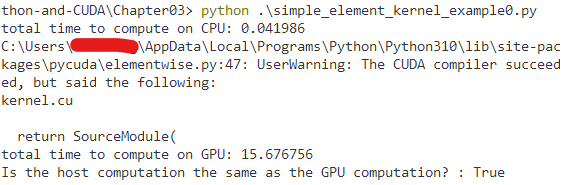

### Run  in IPython

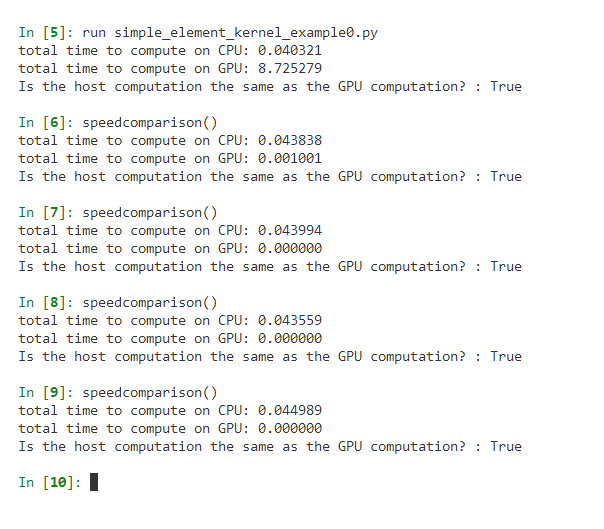

- Speed increases after the first run.
- "PyCUDA compiles our inline CUDA C code the first time a given GPU kernel function is called using the nvcc compiler. After the code is compiled, then it is cached and re-used for the remainder of a given Python session."
